In [71]:
var('B11', 'B22', 'B33', 'B21', 'B31', 'B32', 'u1', 'u2', 'u3', 'm1', 'm2', 'm3')

u = vector([u1, u2, u3])
m = vector([m1, m2, m3])
B = matrix([[B11, 0, 0], [B21, B22, 0], [B31, B32, B33]])
S = B * B.transpose()
U = (u - m).outer_product(u - m)

pdf = exp(-0.5 * ((u.row() - m.row()) * S.inverse() * (u - m))[0]) / (2 * pi)**(3/2.0) / S.determinant()**0.5
substitutions1 = {B22 : 1, B33 : 1, B21 : 0, B31 : 0, B32 : 0, u1 : -4, u2 : -1, u3 : -4, m1 : -5, m2 : 0, m3 : 4}
substitutions2 = {B11 : 1, B22 : 1, B33 : 1, B31 : 0, B32 : 0, u1 : -4, u2 : -1, u3 : -4, m1 : -5, m2 : 0, m3 : 4}
interval = (0, 5)

In [72]:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{bm}')

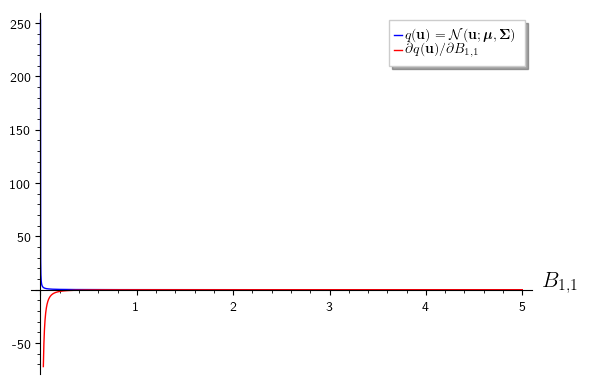

In [73]:
grad1 = pdf.diff(B11).substitute(substitutions1)
plot1 = sum([plot(pdf.substitute(substitutions1), interval, axes_labels=['$B_{1,1}$', ''], legend_label=r'$q(\mathbf{u})=\mathcal{N}(\mathbf{u}; \bm\mu, \bm\Sigma)$'),
plot(grad1, interval, color='red', legend_label=r'$\partial q(\mathbf{u})/\partial B_{1,1}$')])
plot1

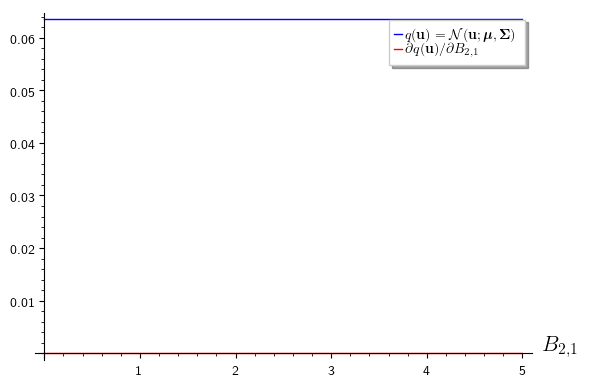

In [74]:
grad1 = pdf.diff(B21).substitute(substitutions2)
plot2 = sum([plot(pdf.substitute(substitutions2), interval, axes_labels=['$B_{2, 1}$', ''], legend_label=r'$q(\mathbf{u})=\mathcal{N}(\mathbf{u}; \bm\mu, \bm\Sigma)$'),
plot(grad1, interval, color='red', legend_label=r'$\partial q(\mathbf{u})/\partial B_{2,1}$')])
plot2

In [48]:
plot1.save('mpaper/sage1.pdf')
plot2.save('mpaper/sage2.pdf')